In [11]:
import sys
sys.version

'3.12.5 | packaged by conda-forge | (main, Aug  8 2024, 18:32:50) [Clang 16.0.6 ]'

In [4]:
import tensorflow as tf
print(tf.__version__)

2.16.2


In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [3]:
# csv 파일 가져오기
df = pd.read_csv("/Users/minsu/Desktop/diabetes.csv", index_col=0)
# 불러온 데이터 확인!
df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,,,,,,,,
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
10,101,76,48,180,32.9,0.171,63,0
2,122,70,27,0,36.8,0.340,27,0
5,121,72,23,112,26.2,0.245,30,0


In [7]:
# 컬럼명 확인
df.columns

Index(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

Text(0.5, 1.0, 'Label')

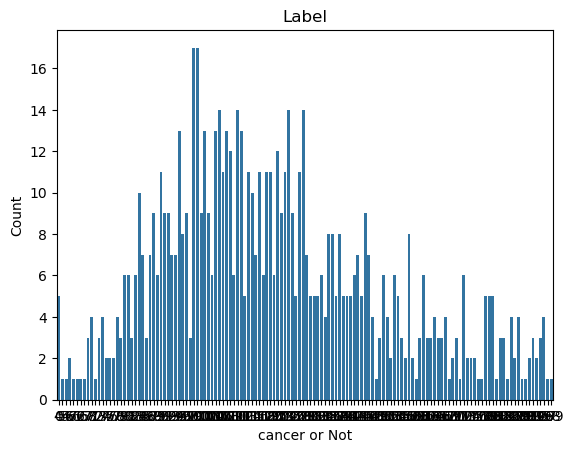

In [11]:
# 레이블 갯수 확인 (그래프)
sns.countplot(data = df, x="Glucose")
# x, y, title name 지정
plt.xlabel("cancer or Not")
plt.ylabel("Count")
plt.title("Label")

Text(0.5, 1.0, 'BMI')

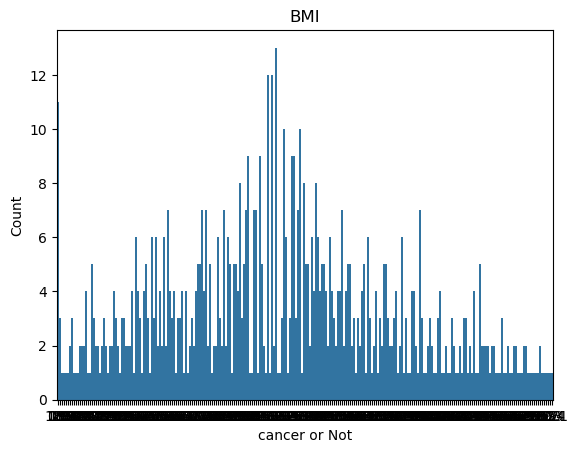

In [12]:
# 레이블 갯수 확인 (그래프)
sns.countplot(data = df, x="BMI")
# x, y, title name 지정
plt.xlabel("cancer or Not")
plt.ylabel("Count")
plt.title("BMI")

In [16]:
# 레이블 갯수 확인 (숫자)
df['BMI'].value_counts()

BMI
32.0    13
31.6    12
31.2    12
0.0     11
32.4    10
        ..
36.7     1
41.8     1
42.6     1
42.8     1
46.3     1
Name: count, Length: 248, dtype: int64

In [17]:
# 결축치 확인
df.isnull().sum()

Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [18]:
# 결축치 제거
df = df.dropna()
df.isnull().sum()

Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

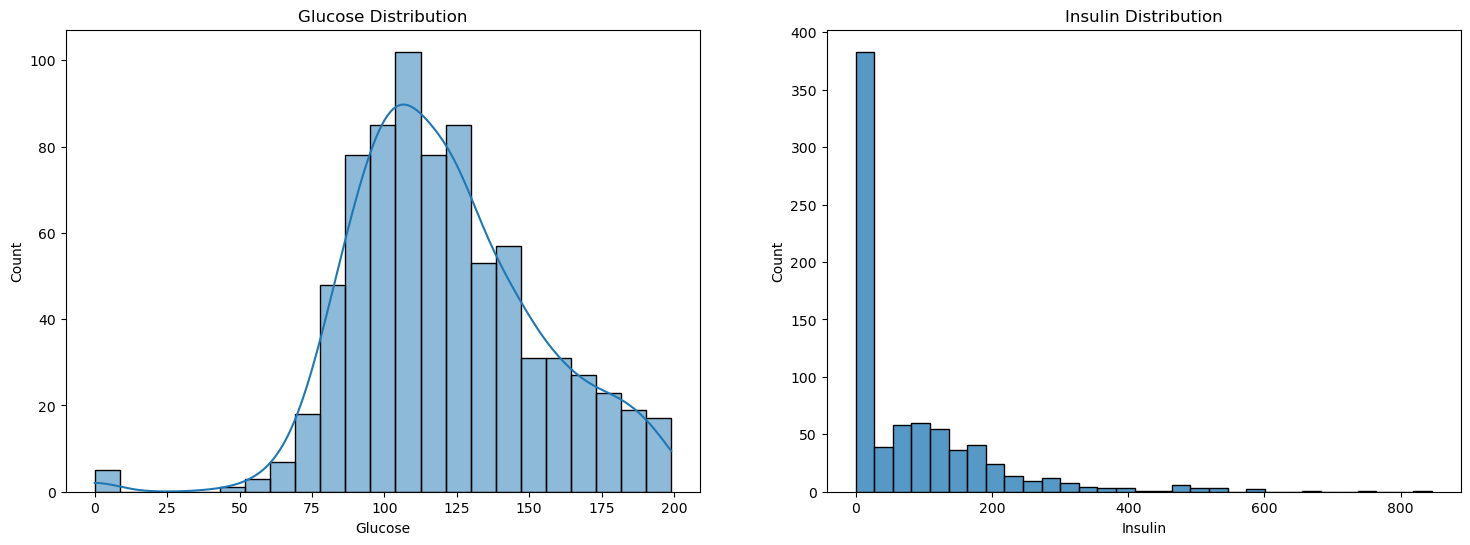

In [20]:
# 히스토그램 시각화
figure = plt.figure(figsize=(18,6))

# 첫 번째 그래프 (Glucose)
ax1 = plt.subplot(1,2,1)
sns.histplot(df['Glucose'], kde=True, ax=ax1)
ax1.set_title('Glucose Distribution')

# 두 번째 그래프 (Insulin)
ax2 = plt.subplot(1,2,2)
sns.histplot(df['Insulin'], kde=False, ax=ax2)
ax2.set_title('Insulin Distribution')

plt.show()

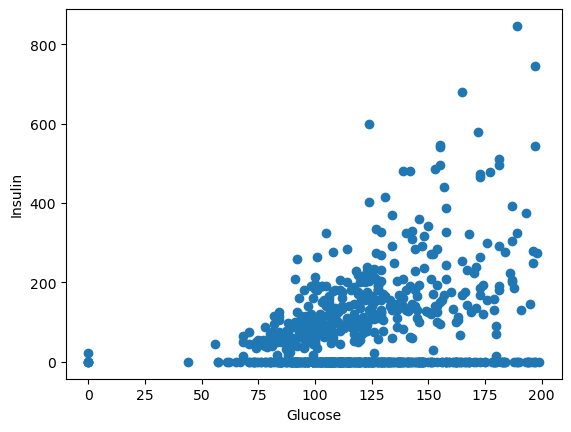

In [21]:
# 산점도 확인
plt.scatter(df['Glucose'], df['Insulin'])
plt.xlabel('Glucose')
plt.ylabel('Insulin')

plt.show()

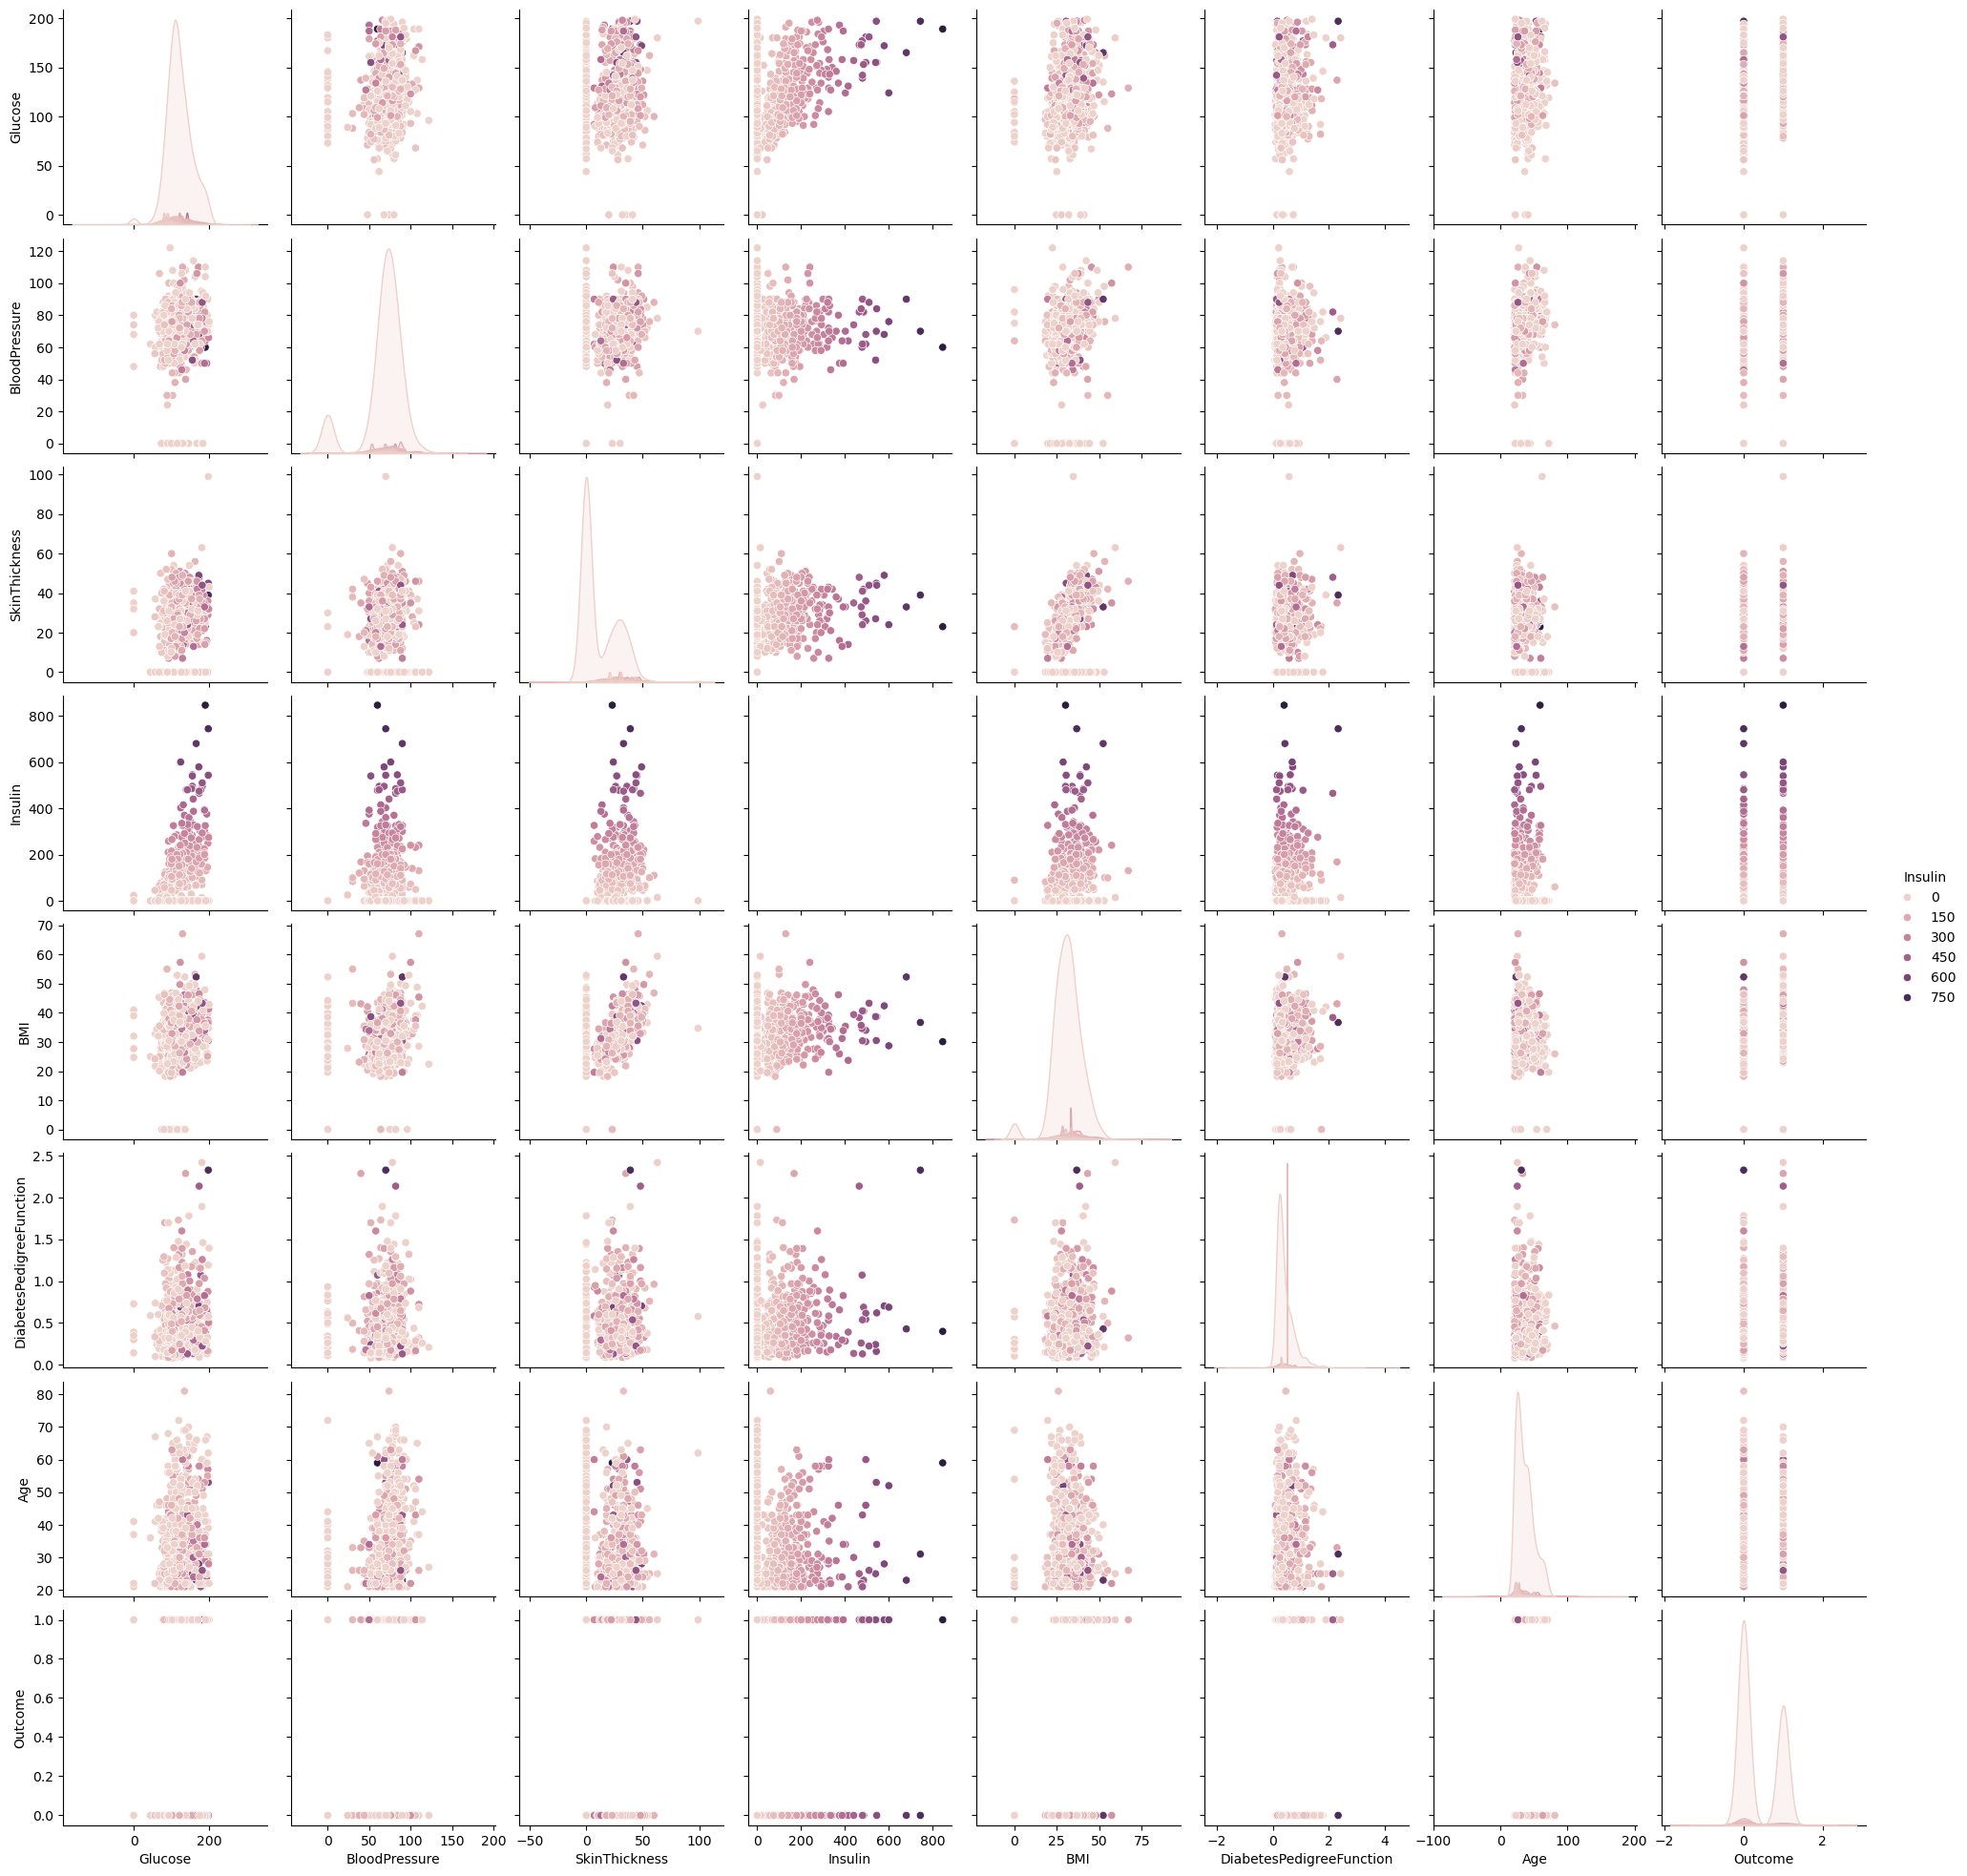

In [23]:
# pairplot 사용해 각 상관관계 살펴보기
sns.pairplot(df, vars=['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'Outcome'],
            hue = 'Insulin')

plt.show()

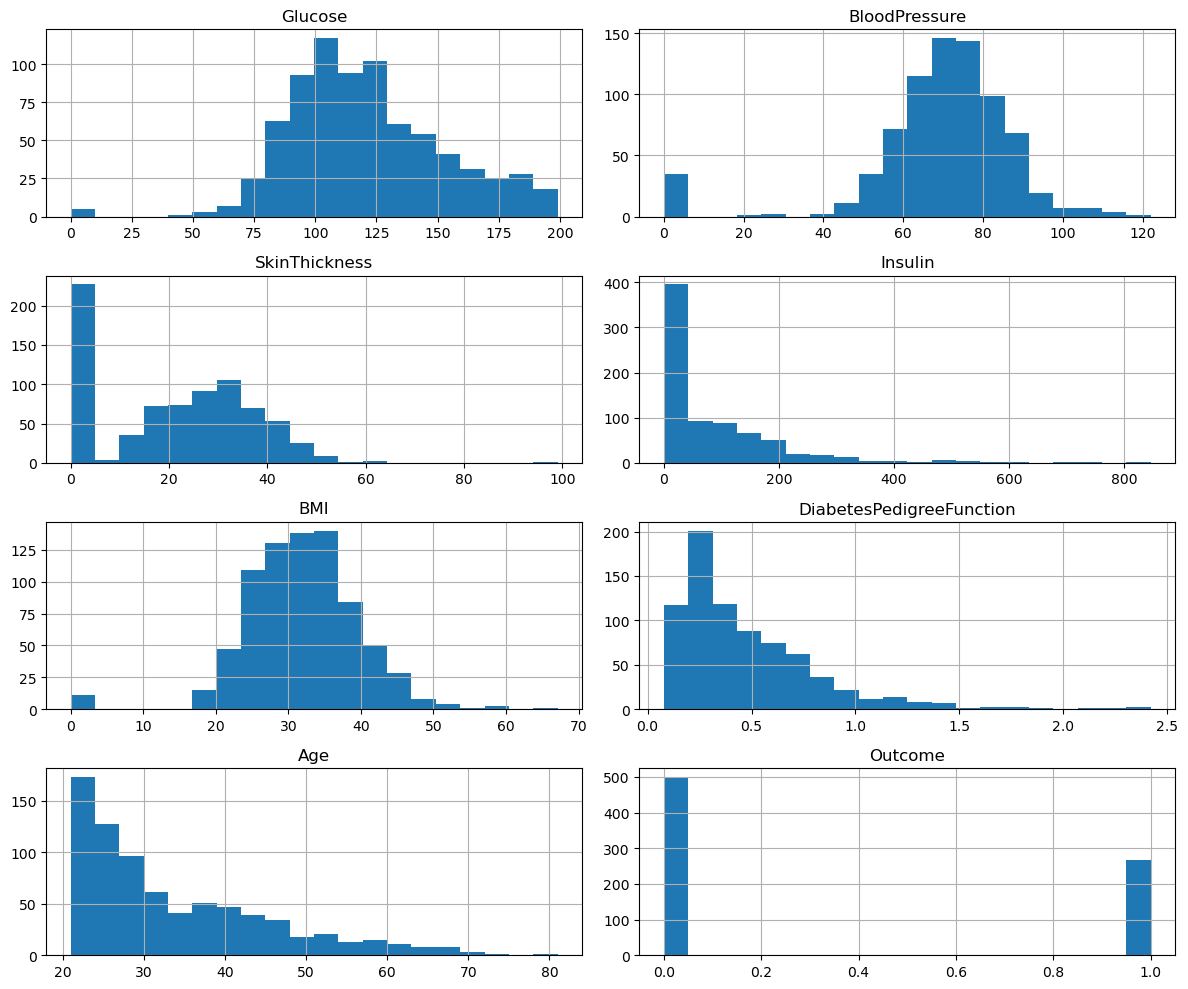

In [27]:
# 각 컬럼별 히스토그램 확인

# 새로운 Figure와 subplots 생성
fig, axs = plt.subplots(4, 2, figsize=(12, 10))  # 4행 2열로 서브플롯 생성

# 데이터프레임의 각 컬럼에 대해 히스토그램 그리기
df_columns = df.columns

# 반복문으로 히스토그램을 각 축(axs)에 그리기
for i, ax in enumerate(axs.flat):
    if i < len(df_columns):
        df[df_columns[i]].hist(ax=ax, bins=20)
        ax.set_title(df_columns[i])

# 레이아웃 자동 조정
plt.tight_layout()
plt.show()

# 1. 당뇨병 데이터를 가지고 머신러닝 5가지 분류 수행

## 데이터셋 준비

In [56]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


# 데이터 로드 (예시로 CSV 파일 사용)
df = pd.read_csv('/Users/minsu/Desktop/diabetes.csv', index_col=0)

# 독립 변수(X)와 종속 변수(y) 분리
X = df.drop('Outcome', axis=1)  # 종속변수 'Outcome' 제외
y = df['Outcome']  # 종속변수

# 데이터 분할 (80% 훈련, 20% 테스트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## SVM 분류 수행

In [60]:
from sklearn.svm import SVC

# SVM 모델 생성 및 학습
svm_model = SVC()
svm_model.fit(X_train, y_train)

# 예측 및 성능 평가
y_pred_svm = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, y_pred_svm)

print(f"SVM Accuracy: {svm_accuracy:.2f}")
print(confusion_matrix(y_test, y_pred_dt))

SVM Accuracy: 0.77
[[75 24]
 [16 39]]


## LR 분류 수행

In [59]:
from sklearn.linear_model import LogisticRegression

# LR 모델 생성 및 학습
lr_model = LogisticRegression(max_iter=200)
lr_model.fit(X_train, y_train)

# 예측 및 성능 평가
y_pred_lr = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, y_pred_lr)
print(f'LR Accuracy: {lr_accuracy:.2f}')
print(confusion_matrix(y_test, y_pred_dt))

LR Accuracy: 0.77
[[75 24]
 [16 39]]


## Random Forest 분류 수행

In [58]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"RF Accuracy: {rf_accuracy:.2f}")
print(confusion_matrix(y_test, y_pred_dt))

RF Accuracy: 0.76
[[75 24]
 [16 39]]


## Decision Tree 분류 수행

In [57]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, y_pred_dt)
print(f'DT Accuracy: {dt_accuracy:.2f}')
print(confusion_matrix(y_test, y_pred_dt))

DT Accuracy: 0.74
[[75 24]
 [16 39]]


## K-NN 분류 수행

In [61]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, y_pred_knn)
print(f'KNN Accuracy: {knn_accuracy:.2f}')
print(confusion_matrix(y_test, y_pred_dt))

KNN Accuracy: 0.68
[[75 24]
 [16 39]]


## 각 분류 수행 Accuracy
<hr>
SVM(support Vector Machine) Accuracy -> 0.77 <br>
LR(Logistic Regression) Accuracy -> 0.77 <br>
RF(Random Forest) Accuracy -> 0.76 <br>
DT(Decision Tree) Accuracy -> 0.74 <br>
KNN(K-Nearest Neighbors) Accuracy -> 0.68

# 2. DeepLearning Classifier (Only Dense Layer)

## 데이터셋 준비

In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('/Users/minsu/Desktop/diabetes.csv')

X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [52]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    # Ipnut Layer, Hidden Layer
    Dense(64, input_shape=(X_train_scaled.shape[1],), activation='relu'),
    Dense(32, activation='relu'), # Second Hidden Layer
    Dense(16, activation='relu'), # Third Hidden Layer
    Dense(1, activation='sigmoid') # Output Layer. Use Sigmoid because it is a Binary Classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50


2024-09-11 21:18:16.572900: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 188ms/step - accuracy: 0.4567 - loss: 0.6967 - val_accuracy: 0.6585 - val_loss: 0.6444
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7320 - loss: 0.6101 - val_accuracy: 0.6585 - val_loss: 0.6002
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7553 - loss: 0.5471 - val_accuracy: 0.6992 - val_loss: 0.5571
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7527 - loss: 0.5143 - val_accuracy: 0.7236 - val_loss: 0.5287
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8082 - loss: 0.4350 - val_accuracy: 0.7398 - val_loss: 0.5054
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7816 - loss: 0.4521 - val_accuracy: 0.7561 - val_loss: 0.4967
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7835 - loss: 0.4472 - val_accuracy: 0.7724 - val_loss: 0.4884
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8368 - loss: 0.3995 - val_accuracy: 0.7642 - val_loss: 0.

In [53]:
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f'DL Model Accuracy: {accuracy:.2f}')

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7155 - loss: 0.6612
DL Model Accuracy: 0.71


# 3. Outcome 삭제 후 BMI 예측 회귀 수행

In [68]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 데이터 로드
df = pd.read_csv('/Users/minsu/Desktop/diabetes.csv')

# 'Outcome'을 제거하고 'BMI'를 종속 변수로 설정
X = df.drop(['Outcome', 'BMI'], axis=1)  # 독립 변수 (종속 변수인 BMI와 Outcome 제거)
y = df['BMI']  # 종속 변수 (예측할 값)

# 데이터 분할 (80% 훈련, 20% 테스트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 선형회귀 수행

In [85]:
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

y_pred = reg_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

MSE: 52.24
R-squared: 0.27


## Random Forest Regression

In [86]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'RF MSE: {mse_rf:.2f}')
print(f'RF r2: {r2_rf:.2f}')

RF MSE: 47.74
RF r2: 0.33


## SVR

In [87]:
from sklearn.svm import SVR

svr_model = SVR(kernel='linear')
svr_model.fit(X_train, y_train)

y_pred_svr = svr_model.predict(X_test)

mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print(f'SVR MSE: {mse_svr:.2f}')
print(f'SVR r2: {r2_svr:.2f}')

SVR MSE: 53.21
SVR r2: 0.25


## 각 회귀 수행 성능 평가
LG MSE -> 52.24 <br>
LG R-squared -> 0.27<br>
<br>
RF MSE -> 47.74 <br>
RF r2 -> 0.33 <br>
<br>
SVR MSE -> 53.21 <br>
SVR r2 -> 0.25

# 4. 3번과 동일 Dense Layer만 사용한 신경망으로 Regression 수행

## 데이터셋 준비

In [106]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('/Users/minsu/Desktop/diabetes.csv')

X = df.drop(['Outcome', 'BMI'], axis=1)
y = df['BMI']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [102]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

model = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 1039.0365 - val_loss: 1011.4423
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 919.9382 - val_loss: 901.6684
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 830.3516 - val_loss: 711.9741
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 603.1592 - val_loss: 431.4141
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 362.8322 - val_loss: 165.2363
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 146.4197 - val_loss: 96.6401
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 118.8054 - val_loss: 86.2196
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 87.9039 - val_loss: 83.4248
Epoch 9/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 75.3652 - val_loss: 78.0732
Epoch 10/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 101.3970 - val_loss: 75.5359
Epoch 11/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 72.6191 - val_loss: 72.8257
Epoch 12/50
16/16 ━━━━━━━━━━━━━━━━

In [103]:
mse = model.evaluate(X_test_scaled, y_test)
print(f'DL Model MSE: {mse:.2f}')

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 65.4469 
DL Model MSE: 68.55
